Autoencoder for dimensionality reduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [3]:
X_train = X_train/255
X_test = X_test/255

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [5]:
#stacked autoencoder

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [6]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [7]:
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss='binary_crossentropy', 
                    optimizer=SGD(learning_rate=1.5),
                    metrics=['accuracy'])

In [8]:
val_data = np.concatenate((X_test, X_test), axis=1)
autoencoder.fit(x=X_train, y=X_train, epochs=5,validation_data=(X_test,X_test))

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2519 - accuracy: 0.0839 - val_loss: 0.2210 - val_accuracy: 0.1131
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1924 - accuracy: 0.1568 - val_loss: 0.1759 - val_accuracy: 0.1762
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1662 - accuracy: 0.1905 - val_loss: 0.1546 - val_accuracy: 0.2010
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1507 - accuracy: 0.2073 - val_loss: 0.1428 - val_accuracy: 0.2098
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1431 - accuracy: 0.2180 - val_loss: 0.1399 - val_accuracy: 0.2190


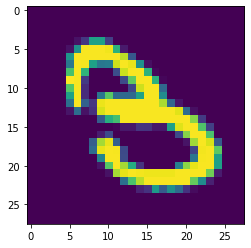

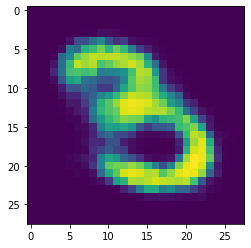

In [22]:
passed_images = autoencoder.predict(X_test[:19])
n=18
plt.imshow(X_test[n])
plt.show()
plt.imshow(passed_images[n])

Section for autoencoder-noise removal

In [24]:
#add noise to the images
from tensorflow.keras.layers import GaussianNoise

In [25]:
sample = GaussianNoise(0.2)
noisy = sample(X_test[:10],training=True) 

Original


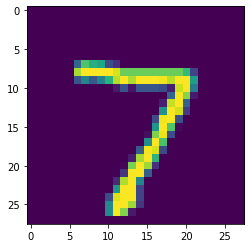

Original image with noise


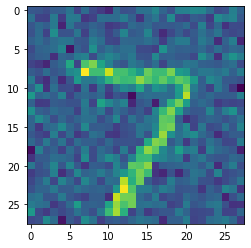

In [26]:
n=0
print('Original')
plt.imshow(X_test[n])
plt.show()
print('Original image with noise')
plt.imshow(noisy[n])
plt.show()

In [ ]:
import tensorflow as tf

In [27]:

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [28]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [29]:
noise_remover = Sequential([encoder,decoder])
noise_remover.compile(loss='binary_crossentropy',
                      optimizer='Adam',
                      metrics=['accuracy'])

In [30]:
noise_remover.fit(X_train,X_train,epochs=8)

Epoch 1/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1804 - accuracy: 0.1697
Epoch 2/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1329 - accuracy: 0.2292
Epoch 3/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1219 - accuracy: 0.2444
Epoch 4/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1162 - accuracy: 0.2538
Epoch 5/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1125 - accuracy: 0.2603
Epoch 6/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1100 - accuracy: 0.2653
Epoch 7/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1080 - accuracy: 0.2688
Epoch 8/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1064 - accuracy: 0.2725


In [39]:
ten_noisey_images = sample(X_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


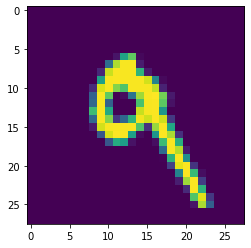

The Noisey Version


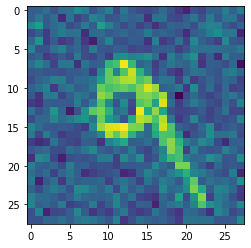

After going through denoiser


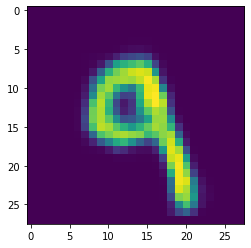

In [40]:
n = 7
print("The Original")
plt.imshow(X_test[n])
plt.show()
print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()
print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()